In [14]:
import json
import re
import gensim
import nltk
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models as gensimvis
import pandas as pd
import pyLDAvis

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

In [15]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\szoko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\szoko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\szoko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
database = 'human_dataset/PoetryFoundationData.csv'

# Load CSV file
df = pd.read_csv(database)
poems = df['Poem'].tolist()

# Define custom stop words
# custom_stop_words = {
#     "love", "heart", "night", "shadows", "like", "time", "light", 
#     "dreams", "life", "dark", "day", "lost", "yet", "truth", "beneath"
# }

# Combine with NLTK stop words
stop_words = set(stopwords.words("english")) #.union(custom_stop_words)

def preprocess_text(text):
    if not isinstance(text, str):
        text = ""
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\W+', ' ', text.lower())  # Remove punctuation
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words and len(word) > 2]

# Tokenize and prepare documents
processed_poems = [preprocess_text(poem) for poem in poems]

In [17]:
from gensim import corpora

# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_poems)
corpus = [dictionary.doc2bow(poem) for poem in processed_poems]

In [18]:
from gensim.models import LdaModel

num_topics = 7

# Train LDA model
# Train LDA model with more topics and adjusted hyperparameters
lda_model = LdaModel(corpus=corpus, 
                     id2word=dictionary, 
                     num_topics=num_topics, 
                     random_state=42, 
                     passes=10, 
                     alpha=0.01, 
                     eta=0.1,
                     per_word_topics=True)

In [19]:
# Calculate Topic Distribution
topic_counts = [0] * lda_model.num_topics
for doc in corpus:
    topic_probs = lda_model.get_document_topics(doc)
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]  # Get the topic with the highest probability
    topic_counts[dominant_topic] += 1

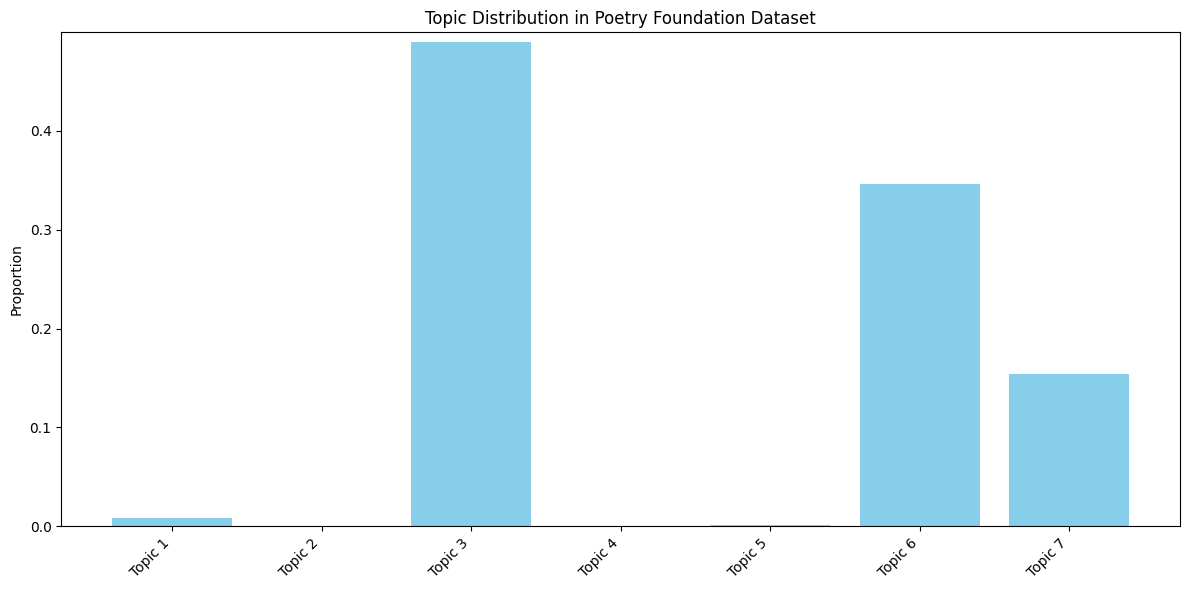

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Convert counts to proportions
topic_proportions = np.array(topic_counts) / len(corpus)

# Prepare topics and proportions for plotting
topics = [f"Topic {i+1}" for i in range(len(topic_proportions))]

# Plot All Topics in One Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(topics, topic_proportions, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, max(topic_proportions) + 0.01)  # Adjust y-axis limit for better visualization
plt.ylabel("Proportion")
plt.title("Topic Distribution in Poetry Foundation Dataset")
plt.tight_layout()  # Ensure labels fit nicely
plt.show()

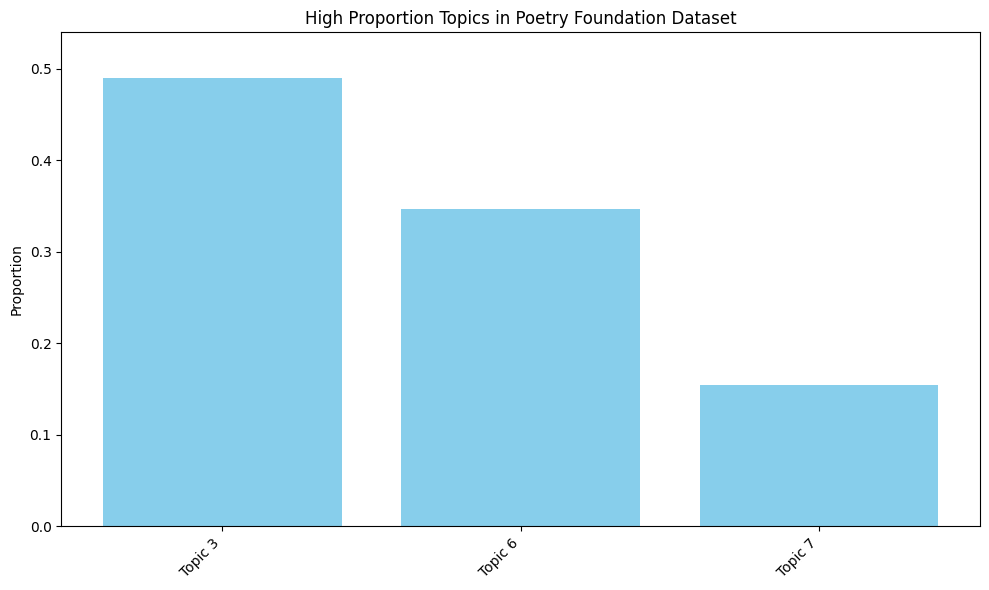

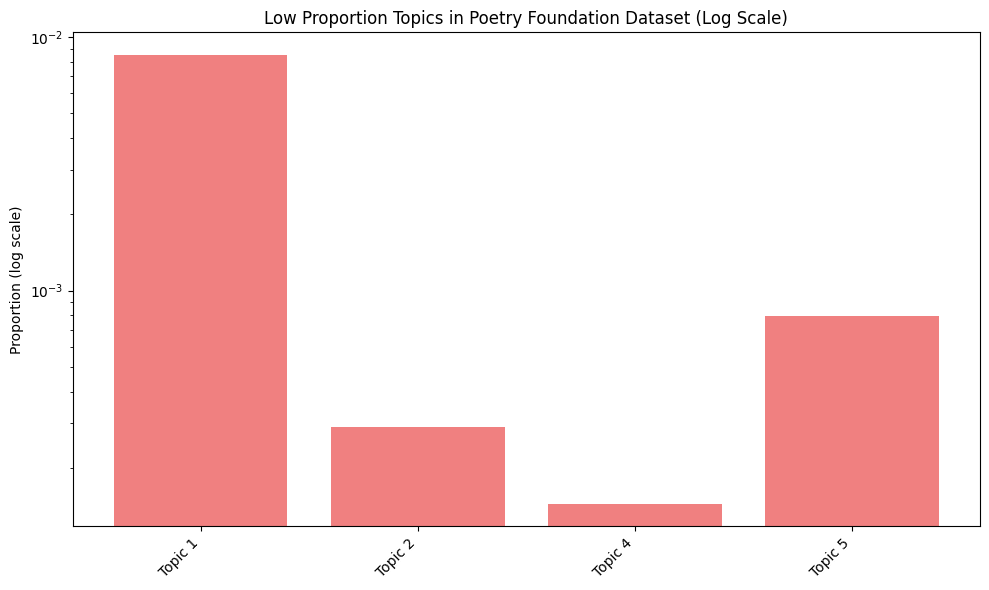

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Convert counts to proportions
topic_proportions = np.array(topic_counts) / len(corpus)

# Threshold for high and low topics
threshold = 0.05

# Separate topics based on the threshold
high_topics = [(f"Topic {i+1}", proportion) for i, proportion in enumerate(topic_proportions) if proportion >= threshold]
low_topics = [(f"Topic {i+1}", proportion) for i, proportion in enumerate(topic_proportions) if proportion < threshold]

# Plot High Proportion Topics
if high_topics:
    topics, proportions = zip(*high_topics)
    plt.figure(figsize=(10, 6))
    plt.bar(topics, proportions, color="skyblue")
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, max(proportions) + 0.05)  # Adjust to give some headroom
    plt.ylabel("Proportion")
    plt.title("High Proportion Topics in Poetry Foundation Dataset")
    plt.tight_layout()
    plt.show()

# Plot Low Proportion Topics with Logarithmic Scale
if low_topics:
    topics, proportions = zip(*low_topics)
    plt.figure(figsize=(10, 6))
    plt.bar(topics, proportions, color="lightcoral")
    plt.xticks(rotation=45, ha="right")
    plt.yscale("log")  # Set y-axis to log scale
    plt.ylabel("Proportion (log scale)")
    plt.title("Low Proportion Topics in Poetry Foundation Dataset (Log Scale)")
    plt.tight_layout()
    plt.show()




## Koherencia számítás


In [22]:
from gensim.models import CoherenceModel

# Calculate coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_poems, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda:.4f}')

Coherence Score: 0.4982


In [23]:
# Display top words for each topic
num_words = 10  # Number of top words per topic
for topic_id in range(lda_model.num_topics):
    top_words = lda_model.show_topic(topic_id, topn=num_words)
    print(f"Top {num_words} words for Topic {topic_id + 1}: {[word for word, prob in top_words]}")

Top 10 words for Topic 1: ['miranda', 'pink', 'raggedy', 'que', 'achilles', 'dey', 'ist', 'les', 'und', 'wrapping']
Top 10 words for Topic 2: ['moloch', 'hys', 'ter', 'eliot', 'notices', 'litel', 'tha', 'doun', 'weel', 'insert']
Top 10 words for Topic 3: ['one', 'like', 'said', 'know', 'would', 'could', 'time', 'say', 'back', 'way']
Top 10 words for Topic 4: ['thir', 'heav', 'thus', 'god', 'son', 'adam', 'camelot', 'thou', 'thee', 'mee']
Top 10 words for Topic 5: ['ful', 'ther', 'hym', 'hire', 'hadde', 'dat', 'wel', 'hir', 'magic', 'whan']
Top 10 words for Topic 6: ['like', 'light', 'night', 'one', 'white', 'water', 'wind', 'eyes', 'sun', 'dark']
Top 10 words for Topic 7: ['thy', 'love', 'thou', 'shall', 'yet', 'thee', 'may', 'one', 'heart', 'life']


In [24]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize topics using PyLDAvis
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)